# Import the Libraries and read the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

In [3]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice




*  N - ratio of Nitrogen content in soil 
*  P - ratio of Phosphorous content in soil
*   K - ratio of Potassium content in soil
*   temperature - temperature in degree Celsius
*   humidity - relative humidity in %
*   ph - ph value of the soil
*   rainfall - rainfall in mm










# Data Wrangling 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.columns 

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

**Since all input variables contributes to our predicton, we don't make any changes in the given data set.**


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# Missing Values Treatment 

**When values are missing in some colums of a dataset then we deal with it as follows**


1.   No values missing then skip this step
1.   If more than 50% values are missing in a column then drop that particular column
2.   Else for continuos values always replace with Median(robost)
1.   For descrete values always replace with Mode of that particular column







In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

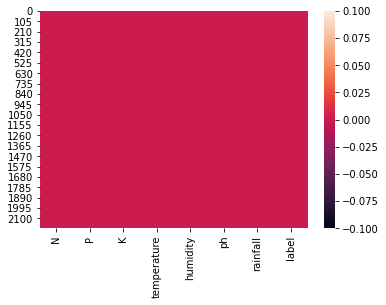

In [9]:
sns.heatmap(df.isnull())

# Exploratory Data Analysis 


*   It is a way of visualizing, summarizing and interpreting the information that is hidden in given dataset.




1. Variable Identification
2. Univariate analysis - histogram and Box Plot
3. Bivariate Analysis - three types
4. Feature Selection
5. Outlier detection

In [ ]:
# Variable Identification

In [11]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
# Continuous Variables = [N,P,K, temperature,humidity,ph,rainfall]
# Categorical Variables =[label]

In [56]:
# Univariate Analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


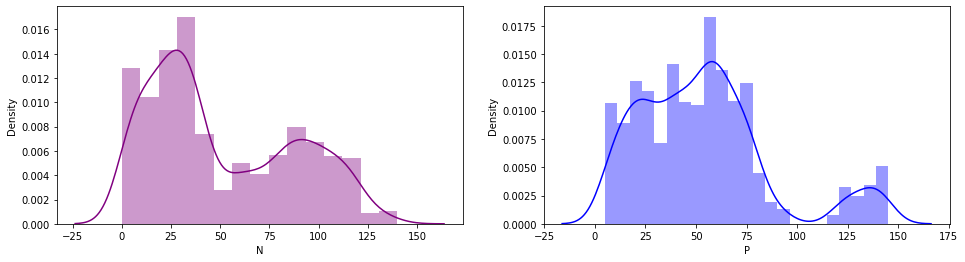

In [12]:
f= plt.figure(figsize=(16,4))
ax=ax=f.add_subplot(121)
sns.distplot(df['N'], color='purple', ax=ax)

ax=f.add_subplot(122)
sns.distplot(df['P'], color='blue', ax=ax)


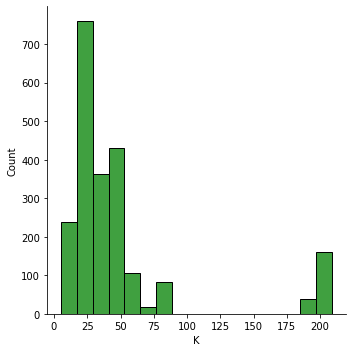

In [13]:
sns.displot(df['K'], color='green', binwidth=12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


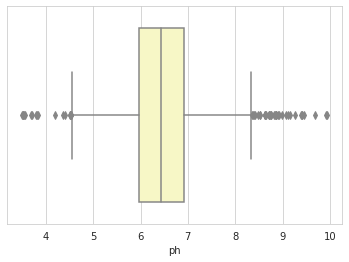

In [14]:
sns.set_style("whitegrid")
sns.boxplot('ph', palette='Spectral',  data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


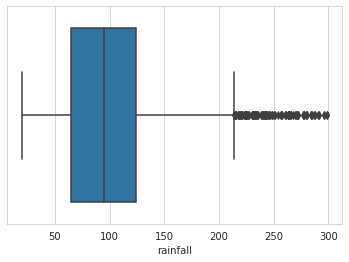

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot('rainfall', data=df)

In [ ]:
# Bi variate analysis 

In [16]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [17]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


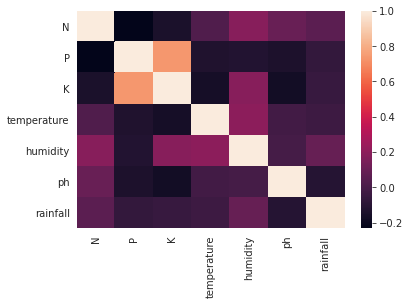

In [18]:
sns.heatmap(df.corr())

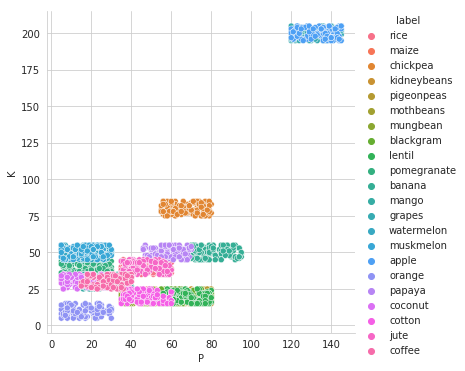

In [19]:
sns.relplot(x="P", y="K", hue="label", data=df);

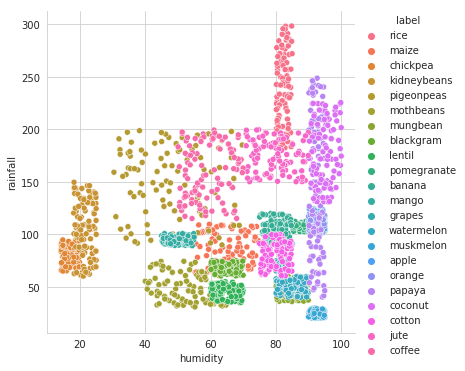

In [20]:
sns.relplot(x="humidity", y="rainfall", hue="label", data=df);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


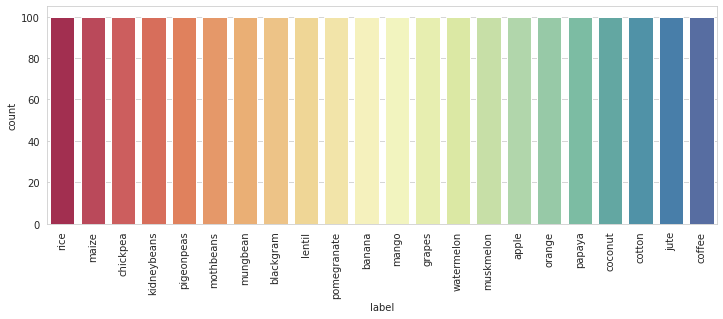

In [21]:
f= plt.figure(figsize=(12,4))
sns.countplot(df['label'] , palette = 'Spectral')
plt.xticks(rotation=90)
plt.show()
# We can clearly see that for every label we have 100 training examples 
# We don't need to remove any label

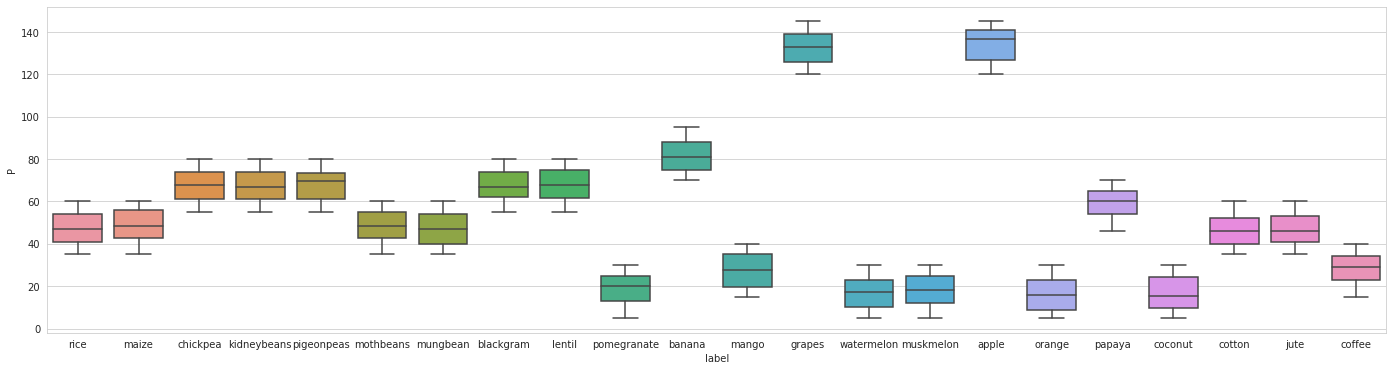

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(24,6))
sns.boxplot(x = 'label', y = 'P', width=0.8, data = df)

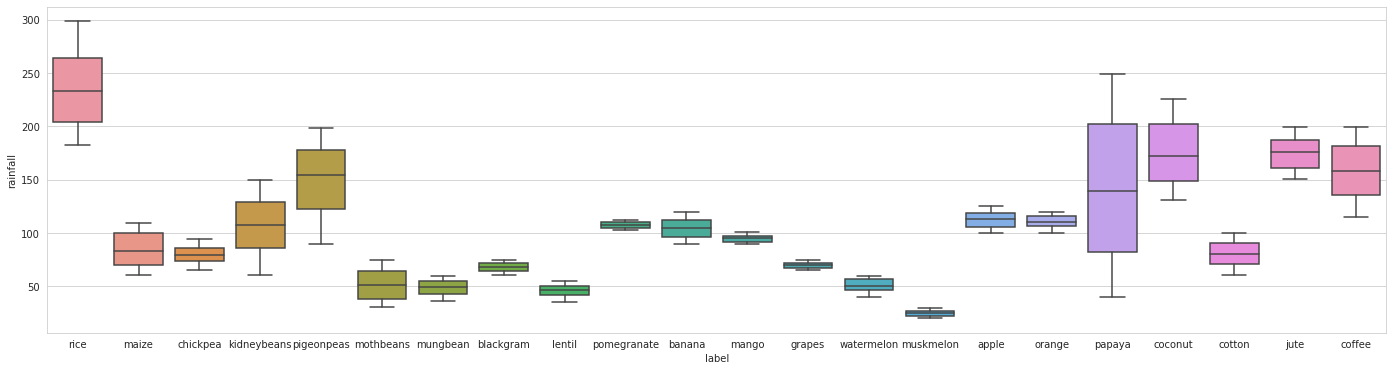

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(24,6))
sns.boxplot(x = 'label', y = 'rainfall', width=0.8, data = df)

In [24]:
df.groupby('label').rainfall.mean()

label
apple          112.654779
banana         104.626980
blackgram       67.884151
chickpea        80.058977
coconut        175.686646
coffee         158.066295
cotton          80.398043
grapes          69.611829
jute           174.792798
kidneybeans    105.919778
lentil          45.680454
maize           84.766988
mango           94.704515
mothbeans       51.198487
mungbean        48.403601
muskmelon       24.689952
orange         110.474969
papaya         142.627839
pigeonpeas     149.457564
pomegranate    107.528442
rice           236.181114
watermelon      50.786219
Name: rainfall, dtype: float64

# Convert the data in Numeric Form



1.   One Hot Encoding

2.   Label Encoding




In [25]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

**Label** **Encoding** 

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
df['label'] = le.fit_transform(df['label'])


In [29]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


# Separating Features and Target Label

In [30]:
X=df.drop('label', axis=1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [31]:
y=df['label']
y.head()

0    20
1    20
2    20
3    20
4    20
Name: label, dtype: int64

**Train Test Split**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3)

# Machine Learning Model

Since it is a classification problem of supervised machine learning, we can use different classification problems as given below: 
1. Logistic Regression
2. Neural Network or MLP
3. SVM
4. Decision Tree
5. Random Forest
6. Naive Bayes
7. KNN

In [34]:
accuracy=[]
model=[]

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
a=lg.score(X_test,y_test)
accuracy.append(a)
model.append('Logistic Regression')
a

0.95

# Neural Network or MLP

In [38]:
from sklearn.neural_network import MLPClassifier

In [39]:
mlp=MLPClassifier(hidden_layer_sizes=[100,100],activation='relu', alpha=0.001).fit(X_train,y_train)

In [40]:
b=mlp.score(X_test,y_test)
accuracy.append(b)
model.append('Neural Network')
b

0.9681818181818181

# SVM

In [41]:
from sklearn.svm import SVC

In [42]:
svm=SVC(C= 2, kernel='rbf').fit(X_train, y_train)

In [43]:
c=svm.score(X_test,y_test)
accuracy.append(c)
model.append('SVM')
c

0.9803030303030303

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
tree= DecisionTreeClassifier().fit(X_train, y_train)

In [47]:
d=tree.score(X_test, y_test)
accuracy.append(d)
model.append('Decision Tree')
d


0.9803030303030303



# **Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rm= RandomForestClassifier( max_depth=12).fit(X_train, y_train)

In [50]:
e=rm.score(X_test,y_test)
accuracy.append(e)
model.append('Random Forest')
e

0.9939393939393939

#Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
nb= GaussianNB().fit(X_train, y_train)

In [53]:
f=nb.score(X_test,y_test)
accuracy.append(f)
model.append('Naive Bayes')
f

0.9939393939393939

#KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn=KNeighborsClassifier(n_neighbors= 31).fit(X_train,y_train)

In [56]:
g=knn.score(X_test,y_test)
accuracy.append(g)
model.append('KNN')
g

0.956060606060606

In [57]:
z= pd.DataFrame({'Logistic Regression':[a], 'Neural Network':[b],'SVM':[c],'Decision Tree':[d],'Random Forest':[e],'Naive Bayes':[f], 'KNN':[g]}).astype(float)

# **Model Accuracy**

In [58]:
z.T

,0
Logistic Regression,0.950000
Neural Network,0.968182
SVM,0.980303
Decision Tree,0.980303
Random Forest,0.993939
Naive Bayes,0.993939
KNN,0.956061


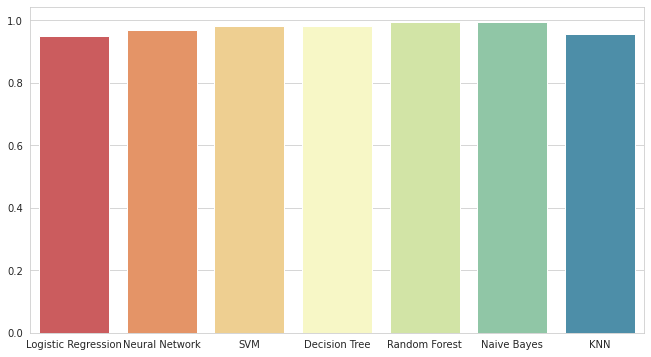

In [59]:
plt.figure(figsize=(11,6))
sns.barplot(x = model , y = accuracy ,palette ='Spectral')